In [10]:
%matplotlib inline
import pandas as pd
from agents.sac import SACAgent
from task import Task
import numpy as np
import os

In [11]:
target_pos = np.array([0., 0., 10.])
task =  Task(target_pos=target_pos, init_pose=np.array([0.0, 0.0, 0.0, 0.0, 0.0, 0.0]), runtime=10.)
sac = SACAgent(task, target_pos, hidden_dim=400)
sac.load_models(os.path.join(os.getcwd(), 'models'))

Models loaded from /home/adrianow/Documents/Udacity/nds/Machine-Learning-Nanodegree/ReinforcementLearning/models


In [12]:
## TODO: Plot the rewards.
rewards = []
test_episode_num = 20
episode_happenings = []

for i in range(test_episode_num):
    state = task.reset()
    episode_reward = 0
    
    while True:
        action = sac.get_actions(state)
        next_state, reward, done = task.step(action.numpy())  

        episode_happening = [i, reward] + [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(action)
        episode_happenings.append(episode_happening)

        state = next_state
        episode_reward += reward

        if done:
            print('\rEpisode {} finished with reward {}'.format(i, episode_reward), end="")
            break

    rewards.append(episode_reward)
            
print('\n\nAverage reward is {:7.3f}'.format(sum(rewards)/len(rewards)))

Episode 19 finished with reward 251.35748203132395

Average reward is 276.936


In [15]:
from IPython.display import clear_output
from mpl_toolkits import mplot3d
import pandas as pd
import matplotlib.pyplot as plt

def plot(frame_idx, rewards):
    clear_output(True)
    plt.figure(figsize=(20,5))
    plt.subplot(131)
    plt.title('frame %s. reward: %s' % (frame_idx, rewards[-1]))
    fig = plt.plot(rewards)
    pd.DataFrame(rewards).rolling(10).mean().plot(fig=fig)
    plt.show()
    

def plot_episode(xyztime):
    """ Plots the episode X, Y, Z, angular velocities and positions """

    fig, axs = plt.subplots(2, 2, figsize=(10,10))

    axs[0,0].plot(xyztime.time, xyztime.x)
    axs[0,0].set_xlabel('time')
    axs[0,0].set_ylabel('x')

    axs[0,0].plot(xyztime.time, xyztime.y)
    axs[0,0].set_xlabel('time')
    axs[0,0].set_ylabel('y')

    axs[0,0].legend()

    axs[0, 1].plot(xyztime.time, xyztime.z)
    axs[0, 1].set_xlabel('time')
    axs[0, 1].set_ylabel('z')


    axs[1, 0].plot(xyztime.time, xyztime.phi_velocity)
    axs[1, 0].plot(xyztime.time, xyztime.theta_velocity)
    axs[1, 0].plot(xyztime.time, xyztime.psi_velocity)
    axs[1, 0].set_xlabel('time')
    axs[1, 0].set_ylabel('z')
    axs[1, 0].legend()


    axs[1, 1].plot(xyztime.time, xyztime.phi)
    axs[1, 1].plot(xyztime.time, xyztime.theta)
    axs[1, 1].plot(xyztime.time, xyztime.psi)
    axs[1, 1].set_xlabel('time')
    axs[1, 1].set_ylabel('z')
    axs[1,1].legend()

    fig.tight_layout()
    
def plot_3d(xyztime):
    X = xyztime.x.values
    Y = xyztime.y.values
    Z = xyztime.z.values
    fig3D = plt.figure(figsize=(6,6))
    ax3D = plt.axes(projection='3d')
    ax3D.scatter3D(X,Y,Z)
    ax3D.plot(X,Y,Z, color='r')
    ax3D.set_xlabel('x')
    ax3D.set_ylabel('y')
    ax3D.set_zlabel('z')
    plt.show()
    

labels = ['episode_i', 'reward', 'time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
create_happenings_df = lambda x: pd.DataFrame(x, columns=labels)

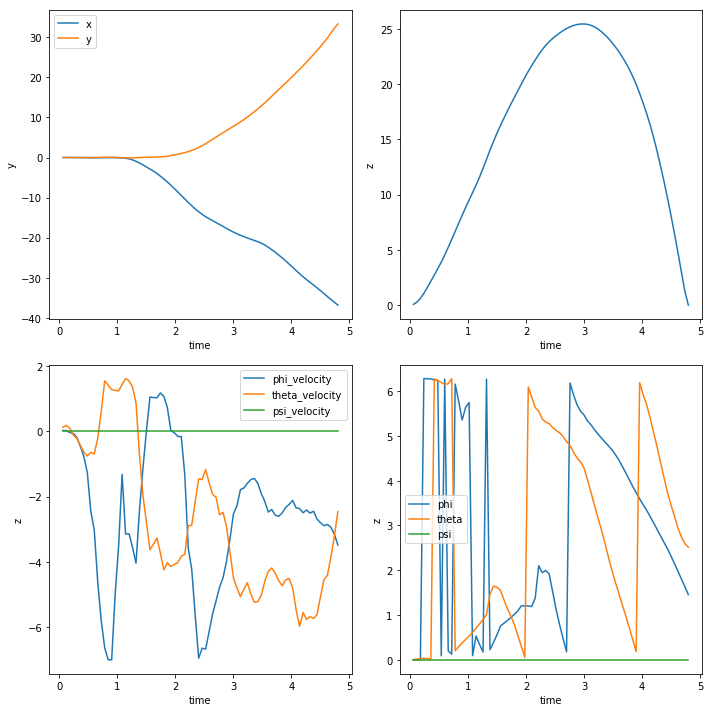

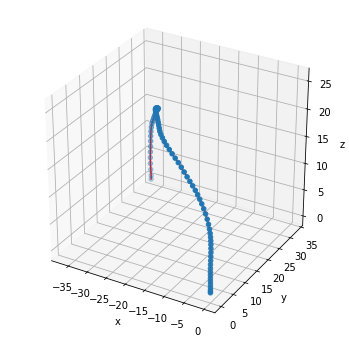

In [16]:
df = create_happenings_df(episode_happenings)
df.tail()
last_episode = df[df.episode_i==df.episode_i.max()]
plot_episode(last_episode)
plot_3d(last_episode)